#LLT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
b = 34.1 # m
V_inf = 220.8 # m/s
a0 = -0.0294221823917985  #TAT
alt = (4550 + 7300)/2 # m - punto medio de FL150 y FL240
p = 0.665614 # kg/m^3

Se va a trabajar en base a la geometría del ala del airbus a320 que es el avión del que se ha hecho el análisis desde un comienzo. Se va a trabajar con el valor de 8° en el angulo de ataque para el regimen de ascenso máximo. \\
el valor de la densidad se obtuvo de [Densidad](https://www.translatorscafe.com/unit-converter/es-ES/calculator/altitude/?a=35000&au=ft&to=10&tu=C)

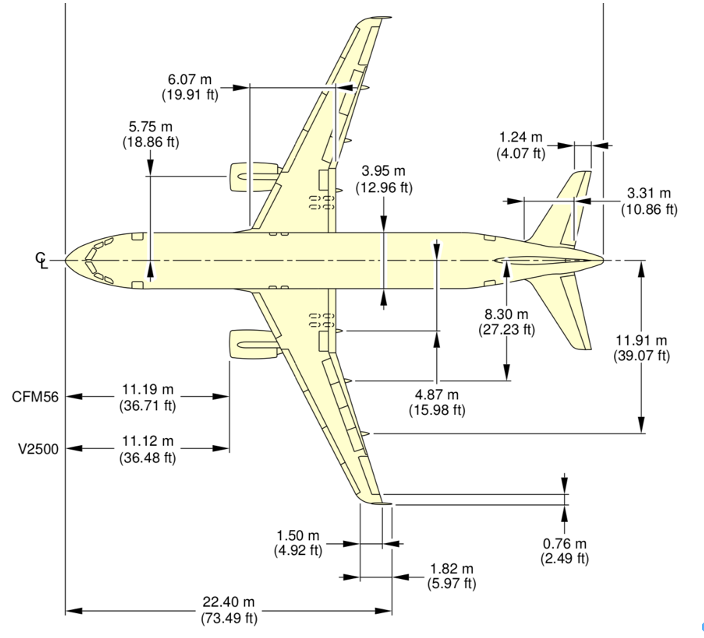

Se va a simplificar la geometría del ala a dos seccióne:
-Una sección creciente desde la punta del ala izquierda hasta el fuselaje, con ecuación de la cuerda: \\
$c = \frac{457}{1705}x + 6.07 \ \ -\frac{b}{2}\leq x \leq 0$ \\
-y una zona decreciente del fuselaje a la punta del ala derecha, con ecuación: \\
$c = -\frac{457}{1705}x + 6.07 \ \ 0 \leq x \leq \frac{b}{2}$ \\
Todo en unidades de metros

In [ ]:
N = 40
ys = np.linspace(-b/2,b/2,N+2)
ts = np.arccos(-2*ys/b)


(array([-17.05      , -16.21829268, -15.38658537, -14.55487805,
        -13.72317073, -12.89146341, -12.0597561 , -11.22804878,
        -10.39634146,  -9.56463415,  -8.73292683,  -7.90121951,
         -7.0695122 ,  -6.23780488,  -5.40609756,  -4.57439024,
         -3.74268293,  -2.91097561,  -2.07926829,  -1.24756098,
         -0.41585366,   0.41585366,   1.24756098,   2.07926829,
          2.91097561,   3.74268293,   4.57439024,   5.40609756,
          6.23780488,   7.0695122 ,   7.90121951,   8.73292683,
          9.56463415,  10.39634146,  11.22804878,  12.0597561 ,
         12.89146341,  13.72317073,  14.55487805,  15.38658537,
         16.21829268,  17.05      ]),
 array([0.        , 0.31363137, 0.44539857, 0.54782656, 0.63532639,
        0.71346678, 0.78510072, 0.85192384, 0.9150435 , 0.97523249,
        1.03305765, 1.08895162, 1.1432556 , 1.19624644, 1.24815451,
        1.29917603, 1.34948188, 1.39922409, 1.44854079, 1.49756015,
        1.54640366, 1.59518899, 1.64403251, 1.6930

In [ ]:
B = np.zeros((N,N))
C = np.zeros(N)
a = np.deg2rad(8)
C += a - a0

for i in range(1,N+1):
  
  if ys[i] <= 0:
    cc = ys[i]*(457/1705) + 6.07
  else:
    cc = -ys[i]*(457/1705) + 6.07
  
  for n in range(1,N+1):
    B[i-1,n-1] = np.sin(n*ts[i])*(2*b/(np.pi*cc)+n/np.sin(ts[i]))

A = np.linalg.solve(B,C)


array([-2.40843323e-01, -1.21533925e-10, -5.84624290e-01, -1.57875405e-10,
       -7.26082555e-01, -1.31477111e-10, -7.56650472e-01, -5.45101577e-11,
       -7.13923982e-01,  5.74144742e-11, -6.27549340e-01,  1.86282107e-10,
       -5.19033616e-01,  3.11054559e-10, -4.04910951e-01,  4.10369790e-10,
       -2.97414154e-01,  4.66755755e-10, -2.04783212e-01,  4.71381419e-10,
       -1.31309376e-01,  4.26909251e-10, -7.77322031e-02,  3.46936700e-10,
       -4.20113628e-02,  2.51627322e-10, -2.04355650e-02,  1.61149390e-10,
       -8.77979968e-03,  8.96319805e-11, -3.24728790e-03,  4.22440817e-11,
       -9.96097345e-04,  1.62506215e-11, -2.38920652e-04,  4.80106414e-12,
       -4.01823006e-05,  9.72388579e-13, -3.62857284e-06,  1.02157302e-13])

In [ ]:
g = np.zeros(N)

for n in range(N):
  g += A[n]*np.sin(n*ts[1:N+1])
g *= 2*b*V_inf
g1 =g[:int(N/2)]+17982.38201279
g2 = np.zeros(int(N/2))
for i in range(int(N/2)):
  g2[i] = g1[int(N/2)-i-1]
#g2
ze = np.array([0])
G = np.concatenate((ze,g1,g2,ze))


array([0.00000000e+00, 1.08775566e-09, 9.30753332e+03, 1.21131388e+04,
       1.35526036e+04, 1.44351215e+04, 1.50424331e+04, 1.54934402e+04,
       1.58474200e+04, 1.61371639e+04, 1.63823265e+04, 1.65954381e+04,
       1.67849002e+04, 1.69565904e+04, 1.71147758e+04, 1.72626607e+04,
       1.74027282e+04, 1.75369625e+04, 1.76669975e+04, 1.77942189e+04,
       1.79198343e+04, 1.79198343e+04, 1.77942189e+04, 1.76669975e+04,
       1.75369625e+04, 1.74027282e+04, 1.72626607e+04, 1.71147758e+04,
       1.69565904e+04, 1.67849002e+04, 1.65954381e+04, 1.63823265e+04,
       1.61371639e+04, 1.58474200e+04, 1.54934402e+04, 1.50424331e+04,
       1.44351215e+04, 1.35526036e+04, 1.21131388e+04, 9.30753332e+03,
       1.08775566e-09, 0.00000000e+00])

In [ ]:
g = np.zeros(N)

for n in range(N):
  g += A[n]*np.sin(n*ts[1:N+1])
g *= 2*b*V_inf
g1 =g[:int(N/2)]+30000
g2 = np.zeros(int(N/2))
for i in range(int(N/2)):
  g2[i] = g1[int(N/2)-i-1]
#g2
ze = np.array([0])
G = np.concatenate((ze,g1,g2,ze))/1e2


(42,)

In [ ]:
from numpy.core.multiarray import concatenate
#Calculo Cl

I = 0
for i in range(N+1):
  I += (ys[i+1]-ys[i])*((G[i+1]+G[i])/2)

S = ((6.07+1.5)*b/2) #Forma trapezoideal
L = p*V_inf*G
cl = 2*I/(V_inf*S)
AR = b**2/S

# Calculo alfas

a = np.zeros(N)
for n in range(N):
  a += n*A[n]*np.sin(n*ts[1:N+1])/np.sin(ts[1:N+1])

# Calculo Cd
I = 0
for i in range(1,N-1):
  I += (ys[i+1]-ys[i])*((G[i+1]*a[i+1]+G[i]*a[i])/2)

d = L[1:N+1]*abs(a)
D = np.concatenate((ze,d,ze))

cd = 2*I/(V_inf*S)

#Calculo downwasht
W = -V_inf*np.tan(abs(a))



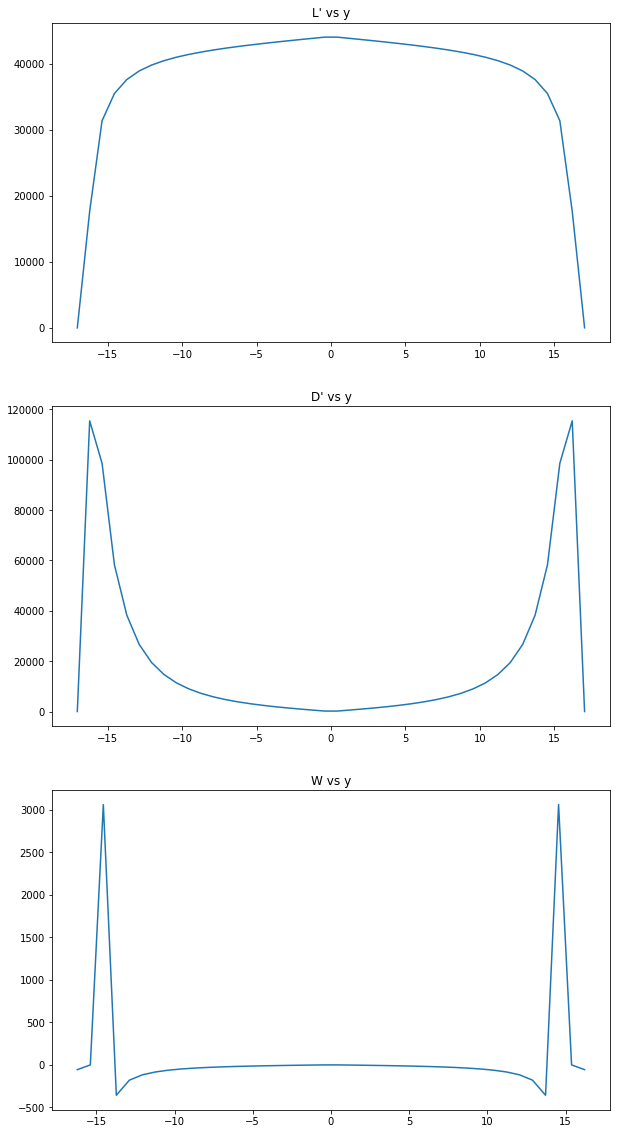

In [ ]:
plt.figure(figsize=(10,20))
plt.subplot(311)
plt.title("L' vs y")
plt.plot(ys,L)
plt.subplot(312)
plt.title("D' vs y")
plt.plot(ys,D)
plt.subplot(313)
plt.title("W vs y")
plt.plot(ys[1:N+1],W)


# VLM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
b = 34.1 # m
V_inf = 220.8 # m/s
a0 = -0.0294221823917985  #TAT
alt = (4550 + 7300)/2 # m - punto medio de FL150 y FL240
p = 0.665614 # kg/m^3

In [52]:
from numpy import core
N = 30+3 # Número de paneles+1 en el eje x
M = 4 # Número de paneles en el eje y
xs = np.linspace(-b/2,b/2,N)
#ys = np.zeros(M*N)
cs = np.zeros(M*N)

for i in range(M):
  for j in range(N):
    cor = 4.57 + (M-i-1)*1.5/(M-1)
    
    if xs[j] <= 0:
      cs[i*(N)+j] = xs[j]*(457/1705) + cor
    else:
      cs[i*(N)+j] = -xs[j]*(457/1705) + cor

h = (6.07-1.5)/int(N-1)
cp = np.zeros((2,N*M-M))
for i in range(M):
  for j in range(N-1):
    cp[0,i*(N-1)+j] = (xs[j+1]+xs[j])/2
    
    if j<=int(N/2-1):
      cp[1,i*(N-1)+j] = (cs[i*N+j]+cs[(i+1)*N+j])/2+h if i<M-1 else cs[i*N+j]/2+h
    else:
      cp[1,i*(N-1)+j] = (cs[i*N+j]+cs[(i+1)*N+j])/2-h if i<M-1 else cs[i*N+j]/2

(-18.755000000000003, 18.755000000000003, -0.30350000000000005, 6.3735)

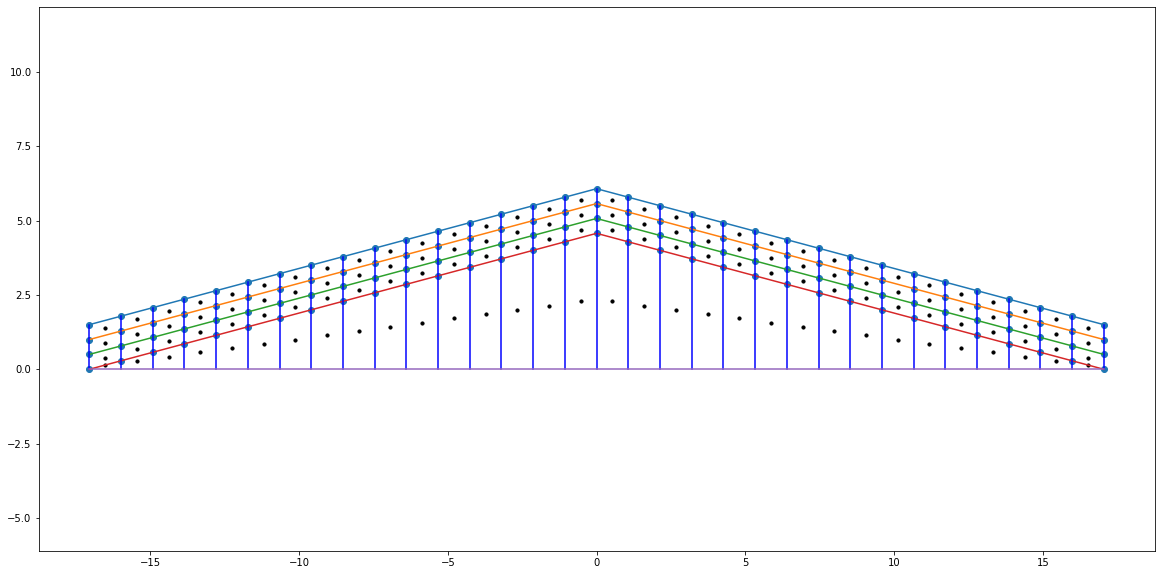

In [53]:
plt.figure(figsize=(20,10))
for i in range(M):
  plt.plot(xs,cs[i*N:(i+1)*N])
for j in range(N):
  plt.plot([xs[j],xs[j]],[cs[j],0],"-b")
plt.plot([xs[0],xs[-1]],[0,0])
plt.scatter(cp[0],cp[1],c="black",s=10)
plt.scatter(np.concatenate((xs,xs,xs,xs)),cs)
plt.axis("equal")

Los puntos azules son los vertices de cada panel y los negros los puntos de control

In [ ]:
k=(xs[1]-xs[0])/2
A = np.zeros((N*M-M,N*M-M))
for i in range(N*M-M):
  for j in range(N*M-M):
    if i != j:
      x = -(cp[1,j]-cp[1,i])
      y = cp[0,j]-cp[0,i]
      R1 = ((x+h)**2+(y+k)**2)**0.5
      R2 = ((x-h)**2+(y-k)**2)**0.5
      ab = ((2*h*(x+h)+2*k*(y+k))/R1-(2*h*(x-h)+2*k*(y-k))/R2)/((x+h)*(y-k)-(x-h)*(y+k))
      al = -(1+((x+h)/R1))/(y+k)
      ar = (1+((x-h)/R2))/(y-k)
      A[i,j] = 1/(4*np.pi)*(ab+al+ar)
      if (np.iscomplex(A[i,j]) or np.isnan(A[i,j]) or np.isinf(A[i,j])): 
        A[i,j] = 0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


para el cálculo de $\theta$ se deriva la ecuación de linea de curvatura media y se saca el porcentaje de la cuerda en cada punto de control.

In [ ]:
import sympy as sp
xu = 0.20637611
x, t = sp.symbols("x t") # x = x/c
Line1 = 2.6376*x**3 - 1.5231*x**2 + 0.3151*x + 0.0009
Line2 = 0.0017*x**2 - 0.0333*x + 0.0314

dzdx1 = sp.diff(Line1,x)
dzdx2 = sp.diff(Line2,x)

In [ ]:

thetas = np.zeros(N*M-M)
a = np.deg2rad(8)
for i in range(M):
  for j in range(N-1):
    #print(cp[0,i*(N-1)+j])
    cor = 6.07#4.57 + (M-i-1)*1.5/(M-1)
    if cp[0,i*(N-1)+j] <= 0:
      cc = cp[0,i*(N-1)+j]*(457/1705) + cor
    else:
      cc = -cp[0,i*(N-1)+j]*(457/1705) + cor
    porc = (cc-cp[1,i*(N-1)+j])/cc
    if porc <= xu:
      dzdt = dzdx1.subs(x,porc)
    else: 
      dzdt = dzdx2.subs(x,porc)
    thetas[i*(N-1)+j] = np.arccos(a-np.arctan2(float(dzdt),1))
C = -V_inf*np.sin(thetas)
G = np.linalg.solve(A,C)

ya teniendo los gamma se calcula la distribución de W, L y D

In [84]:
# Calculando w
W = np.zeros(N*M-M)
for i in range(N*M-M):
  for j in range(N*M-M):
    W[i] = A[i,j]*G[j]

L = abs(p*V_inf*2*k*G)

D = abs(p*V_inf*2*k*G*np.sin(thetas))

Preparando las graficas:

In [85]:
from mpl_toolkits.mplot3d import Axes3D
X = np.zeros((M+1,N))
Y = np.zeros((M+1,N))
Zw = np.zeros((M,N-1))
Zl = np.zeros((M,N-1))
Zd = np.zeros((M,N-1))
for i in range(M+1):
  X[i] = xs
  if i != 0:
    Y[i] = cs[(M-i)*N:(M-i+1)*N]
    Zw[i-1] = W[(M-i)*(N-1):(M-i+1)*(N-1)]
    Zl[i-1] = L[(M-i)*(N-1):(M-i+1)*(N-1)]
    Zd[i-1] = D[(M-i)*(N-1):(M-i+1)*(N-1)]


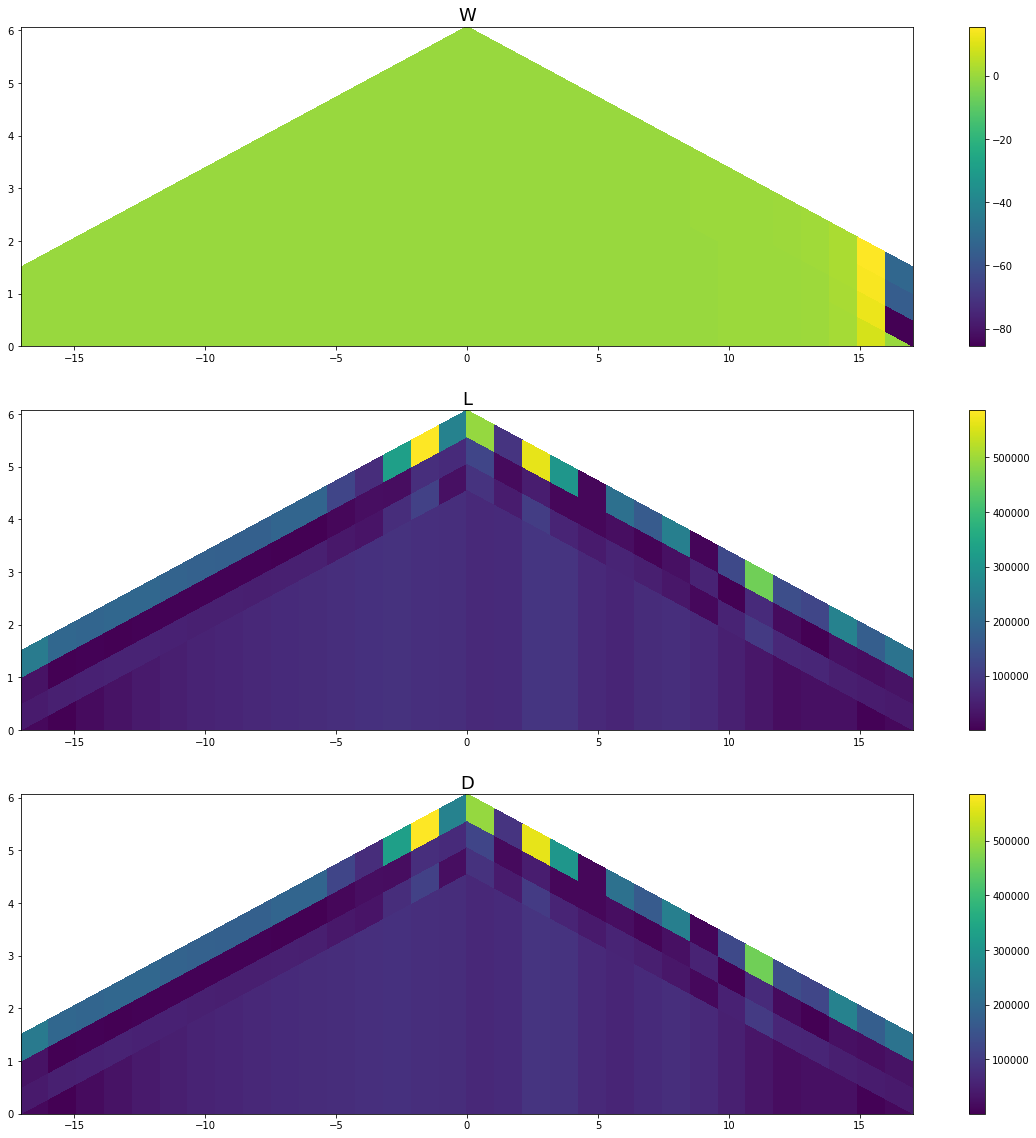

In [86]:
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.title("W",fontsize=18)
plt.pcolormesh(X,Y,Zw)
plt.colorbar()
plt.subplot(312)
plt.title("L",fontsize=18)
plt.pcolormesh(X,Y,Zl)
plt.colorbar()
plt.subplot(313)
plt.title("D",fontsize=18)
plt.pcolormesh(X,Y,Zd)
plt.colorbar()
#plt.show()


Se observa inconsistencias puesto que se esperaría que los valores de la distribución en cualquiera de los casos fuera simetrica a ambos lados. Sin embargo se observan similitudes con el modelo en LLT puesto que la sustentación aumenta desde los bordes del ala hasta el centro. Además, se aprecia que la sustenciación es mayor en la parte frontal y es menor en la parte posterior, lo que se esperaría.